# Langevin Dynamics
## Euler Maruyama

Aim:
- To discretize the Langevin equation using the Euler-Maruyama method.
- To investigate the solution of the Langevin equation.

### Langevin equation

Consider the Langevin equation, defining processes 
$X ( t )$ and $V ( t )$ on $t \in [ 0, \infty )$ where

\begin{align*}
  dX & = V dt, \\
  dV & = (-\gamma V + b(X) )dt + \sigma dW,
\end{align*}

with:
- $\gamma \in \mathbb{R}$, $\gamma > 0$ : friction parameter
- $\sigma =  \sqrt{2 \gamma u}$ for $u \in \mathbb{R}$, $u > 0$
- $W(t)$ is a standard one-dimensional Brownian motion on $t \in [ 0, \infty )$ 
- $ b(X) = - \nabla U(X)$ with $U$ the potential.
<br/>
<br/>
The target density in this case of $(X,V)$ is $\pi(x,v) \propto e^{-U(x) - \frac{1}{2u}\| v \|^2}$

### Numerical Scheme: Euler-Maruyama
\begin{align*}
  X_{n+1} & = X_n +  V_n \Delta t, \\
  V_{n+1} & = V_n + (-\gamma V_n - \nabla U(X_n) ) \Delta t + \sigma \Delta W_n,
\end{align*}
with:
- $\Delta t = \frac{T}{N}$
- $X_{n} \approx X(n \Delta t)$, $V_{n} \approx V(n \Delta t)$ and $W_{n} = W(n \Delta t)$
- $\Delta W_n = W_{n+1}-W_n$


**Example:**
<br/> 
Set $U(X)= -\frac{x^2}{2} + \frac{x^4}{4}$, $X \left( 0 \right) = 1$, $V \left( 0 \right) = 0$, $\sigma = 1$, a step size $\Delta t = 0.01$ , $T=10$.


**1.1** Apply the Euler-Maruyama discretization to this problem. Consider $X \left( 0 \right) = 1$, $V \left( 0 \right) = 0$, $\gamma = \sigma = 1$, a step size $\Delta t = 0.01$, and plot the numerical approximation for the interval $t \in \left[ 0, 10 \right]$.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import math

<IPython.core.display.Javascript object>


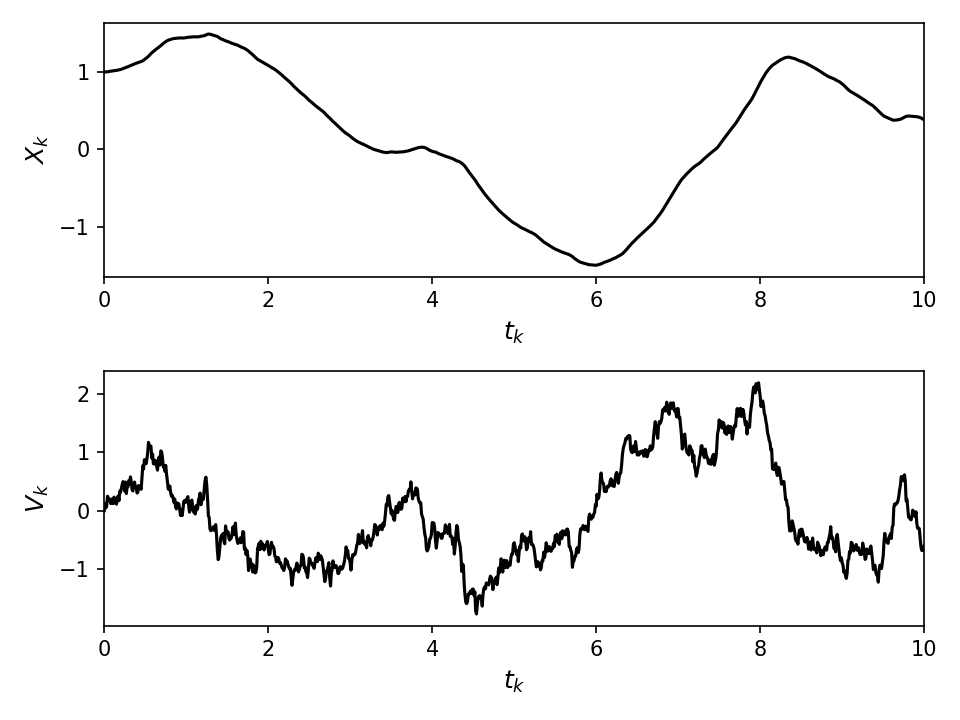

In [36]:
%matplotlib notebook


rng = np.random.default_rng()

def grad_potential(x_n):
    # calculates \nabla U(x_n)
    return (-x_n+np.power(x_n, 3))

    
def langevin_euler_maruyama(x_0, v_0, gamma, sigma, t_k):
    N, = t_k.shape
    N -= 1

    X_k = np.zeros_like(t_k)
    V_k = np.zeros_like(t_k)
    X_k[0] = x_0
    V_k[0] = v_0

    for k in range(N):
        dt = t_k[k + 1] - t_k[k]
        dW = np.sqrt(dt) * rng.standard_normal()
        X_k[k + 1] = X_k[k] + V_k[k] * dt
        V_k[k + 1] = V_k[k] + (- gamma * V_k[k] -grad_potential(X_k[k]) )  * dt + sigma * dW

    return X_k, V_k


x_0 = 1.0
v_0 = 0.0
gamma = 1.0
sigma = 1.0
N = 1001
T = 10.0

t_k = np.linspace(0.0, T, N, dtype=np.float64)
X_k, V_k = langevin_euler_maruyama(x_0, v_0, gamma, sigma, t_k)

fig, ax = plt.subplots(2, 1)

ax[0].plot(t_k, X_k, "k-")
ax[0].set_xlim(t_k[0], t_k[-1])
ax[0].set_xlabel(r"$t_k$", fontsize="large")
ax[0].set_ylabel(r"$X_k$", fontsize="large")

ax[1].plot(t_k, V_k, "k-")
ax[1].set_xlim(t_k[0], t_k[-1])
ax[1].set_xlabel(r"$t_k$", fontsize="large")
ax[1].set_ylabel(r"$V_k$", fontsize="large")

fig.tight_layout()

In [6]:
def EM_Step(Xold,Vold,dt, gamma, sigma):
    n=len(Xold)
    Rn=np.random.randn(n) # n dimensional gaussian variable
    NUXold=grad_potential(Xold)
    
    Xnew = Xold + np.multiply(Vold, dt)
    b = - np.multiply(Vold, gamma) - grad_potential(Xold) 
    Vnew=Vold + np.multiply(b ,dt) + np.multiply( sigma , Rn  )
    return Xnew, Vnew

Xn, Vn =EM_Step(np.array([2,1]), np.array([1,2]) ,0.1,2,0)
print(Xn)
print(Vn)

[2.1 1.2]
[0.2 1.6]


In [29]:
# n : number of paths 
def run_simulation(x0, v0, gamma, sigma, step_function, dt,n):
    X0=np.tile(x0,n)
    V0=np.tile(v0,n)
    Xn=X0
    Vn=V0
    for i in range(1,int(10/dt+1)):
        Xn, Vn =step_function(Xn,Vn,dt, gamma, sigma)
        if i==int(0.1/dt):
            X01=Xn
        if i==int(0.4/dt):
            X04=Xn
        if i==int(2/dt):
            X2=Xn
        if i==int(10/dt):
            X10=Xn
#         if i==int(50/dt):
#             X50=Xn
            
    return X01,X04,X2,X10#,X50

In [31]:
dt=0.01 # step size
n=100000 # number of paths
x0 = 0.0
v0 = 0.0
gamma = 10
sigma = 1.0

X01,X04,X2,X10=run_simulation(x0, v0, gamma, sigma, EM_Step, dt,n)
print(X01)

[ 0.05985281 -0.14245376  0.00458387 ...  0.32193171  0.0700299
 -0.01252047]


<IPython.core.display.Javascript object>


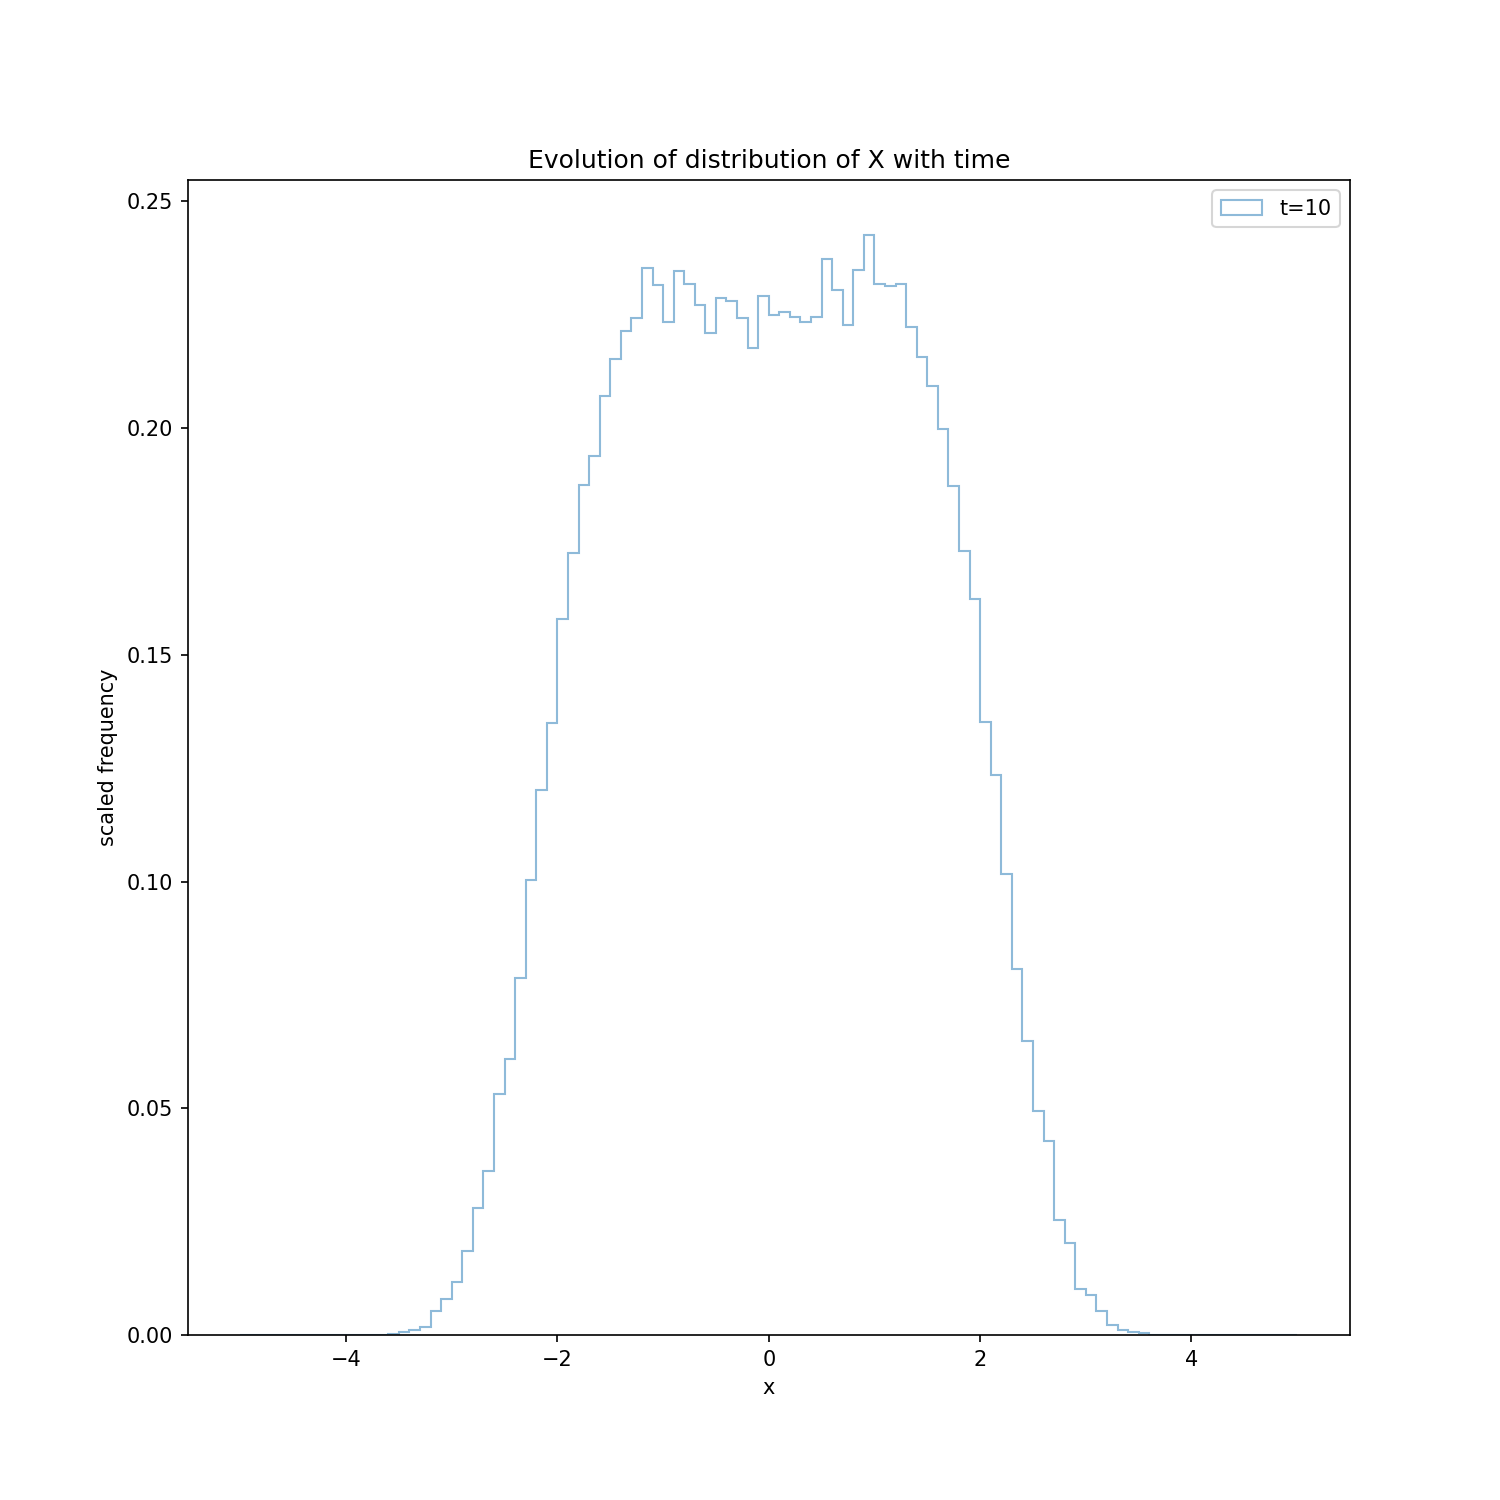

In [33]:
fig = plt.figure(figsize=(10, 10))
plt.hist(X10, bins=100, alpha=0.5, range=[-5,5], label='t=10',histtype=u'step',density=True)
plt.legend(loc='upper right')
plt.title('Evolution of distribution of X with time')
plt.xlabel('x')
plt.ylabel('scaled frequency')
plt.show()

<IPython.core.display.Javascript object>


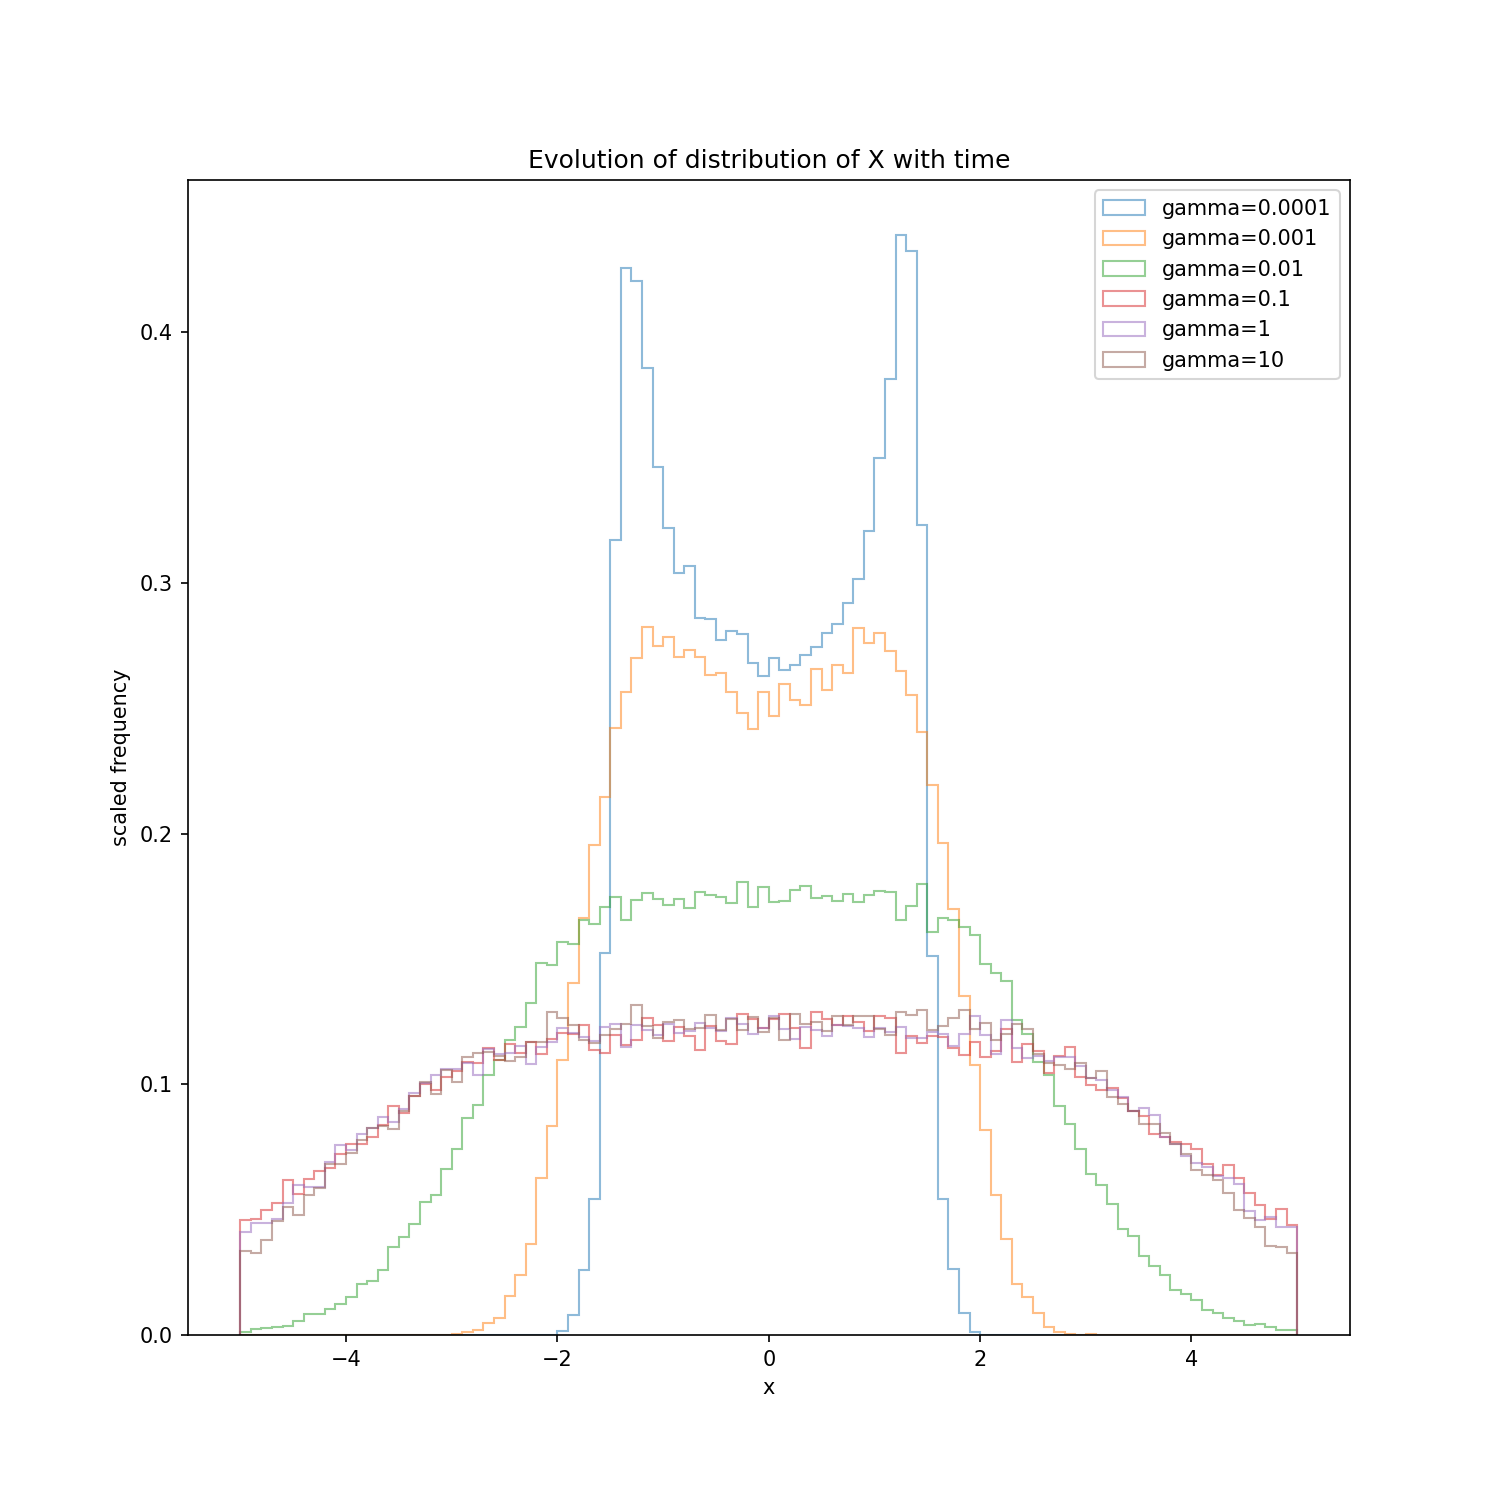

/tmp/ipykernel_70/297980740.py:8: RuntimeWarning: overflow encountered in power
  return (-x_n+np.power(x_n, 3))
/tmp/ipykernel_70/3874262771.py:7: RuntimeWarning: invalid value encountered in subtract
  b = - np.multiply(Vold, gamma) - grad_potential(Xold)
/tmp/ipykernel_70/297980740.py:8: RuntimeWarning: invalid value encountered in add
  return (-x_n+np.power(x_n, 3))


In [37]:


dt=0.01 # step size
n=100000 # number of paths
x0 = 0.0
v0 = 0.0
gamma = 10
sigma = 1.0
u=1
g=[0.0001,0.001,0.01,0.1,1,10]
fig = plt.figure(figsize=(10, 10))

for gamma in g:
    sigma= math.sqrt(2*gamma*u)
    X01,X04,X2,X10=run_simulation(x0, v0, gamma, sigma, EM_Step, dt,n)
    plt.hist(X10, bins=100, alpha=0.5, range=[-5,5], label=f'gamma={gamma}',histtype=u'step',density=True)



plt.legend(loc='upper right')
plt.title('Evolution of distribution of X with time')
plt.xlabel('x')
plt.ylabel('scaled frequency')
plt.show()